In [ ]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
gensim.__version__

'3.6.0'

In [ ]:
np.random.seed(42)

In [ ]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
wv = api.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [ ]:
type(wv)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [ ]:
wv = api.load('word2vec-google-news-300')
wv.save('/content/drive/MyDrive/Toxic_comments/vectors.kv')

[=================================================-] 99.9% 1661.2/1662.8MB downloaded


In [ ]:
wv['apple']

array([-0.06445312, -0.16015625, -0.01208496,  0.13476562, -0.22949219,
        0.16210938,  0.3046875 , -0.1796875 , -0.12109375,  0.25390625,
       -0.01428223, -0.06396484, -0.08056641, -0.05688477, -0.19628906,
        0.2890625 , -0.05151367,  0.14257812, -0.10498047, -0.04736328,
       -0.34765625,  0.35742188,  0.265625  ,  0.00188446, -0.01586914,
        0.00195312, -0.35546875,  0.22167969,  0.05761719,  0.15917969,
        0.08691406, -0.0267334 , -0.04785156,  0.23925781, -0.05981445,
        0.0378418 ,  0.17382812, -0.41796875,  0.2890625 ,  0.32617188,
        0.02429199, -0.01647949, -0.06494141, -0.08886719,  0.07666016,
       -0.15136719,  0.05249023, -0.04199219, -0.05419922,  0.00108337,
       -0.20117188,  0.12304688,  0.09228516,  0.10449219, -0.00408936,
       -0.04199219,  0.01409912, -0.02111816, -0.13476562, -0.24316406,
        0.16015625, -0.06689453, -0.08984375, -0.07177734, -0.00595093,
       -0.00482178, -0.00089264, -0.30664062, -0.0625    ,  0.07

In [ ]:
len(wv['apple'])

300

In [ ]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load('/content/drive/MyDrive/Toxic_comments/vectors.kv')

In [ ]:
wv.similarity("apple","mango")

0.57518554

In [ ]:
wv.similarity("apple","car")

0.12830707

In [ ]:
pairs = [
    ('car','minivan'),
    ('car','bicycle'),
    ('car','airplane'),
    ('car','cereal'),
    ('car','communism')
]
for w1,w2 in pairs:
  print('%r\t%r\t%.2f' %(w1,w2 ,wv.similarity(w1,w2)))

In [ ]:
print(wv.most_similar(positive=['car','minivan'],topn=5))

[('SUV', 0.8532192707061768), ('vehicle', 0.8175783753395081), ('pickup_truck', 0.7763688564300537), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.7565720081329346)]


In [ ]:
print(wv.doesnt_match(['fire','water','land','sea','air','car']))

car


In [ ]:
wv.most_similar(positive=['woman','king'], negative=['man'],topn=3)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951)]

In [ ]:
wv.most_similar(positive=['woman','king'],topn=5)

NameError: ignored

In [ ]:
words = ["one",'two','man','woman','table']

In [ ]:
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[ 0.41775945,  0.906729  ],
       [ 0.52036536,  1.3947775 ],
       [-1.2547548 , -0.3259122 ],
       [-1.6043063 , -0.64717937],
       [ 1.920937  , -1.328415  ]], dtype=float32)

In [ ]:
Visualizing these word vectors

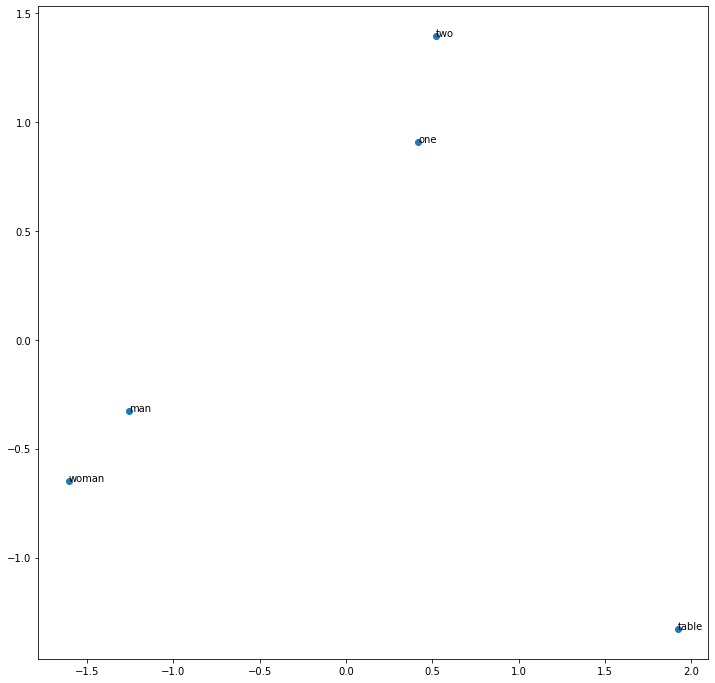

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0],result[:,1])
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i,0],result[i,1]))
plt.show()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Toxic_comments/train.csv',error_bad_lines=False, engine="python",nrows=1000)

<ipython-input-52-6857aaee4720>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/drive/MyDrive/Toxic_comments/train.csv',error_bad_lines=False, engine="python",nrows=1000)


In [ ]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
data.drop(columns=[ 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],axis=1,inplace=True)

In [ ]:
data.head()

,id,comment_text,toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0


In [ ]:
def sent_vec(sent):
  vector_size = wv.vector_size
  wv_res = np.zeros(vector_size)
  print(wv_res)
  ctr=1
  for w in sent:
    if w in wv:
      ctr += 1
      wv_res += wv[w]
  wv_res = wv_res/ctr
  return wv_res

In [ ]:
def spacy_tokenizer(sentence):
  doc = nlp(sentence)

  #print(doc)
  #print(type(doc))

  # Lemmatizing each token and converting each token into lowercase
  mytokens = [word.lemma_.lower().strip() for word in doc]

   # print(mytokens)

   # Removing stop words
  mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations]

  return mytokens

In [ ]:
sent_vec('I am happy')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([-0.08447266,  0.10973685, -0.00453404,  0.18362863, -0.05944824,
       -0.04013497, -0.10041155,  0.03710938, -0.02503313,  0.04729353,
       -0.07543836, -0.16434152, -0.1116333 ,  0.02915737, -0.12290737,
        0.10421317, -0.00425502,  0.27535575, -0.01681083, -0.08075387,
       -0.26747349, -0.07281712,  0.08138602, -0.02498954, -0.05358887,
       -0.07969884, -0.30385045,  0.10531616, -0.03756278, -0.04029192,
        0.06455776, -0.02200753, -0.11361694, -0.12702288, -0.19824219,
        0.06921387, -0.14557757,  0.18457031, -0.05542864,  0.10093471,
        0.10728237, -0.07920619, -0.01236398,  0.11485073,  0.09437779,
        0.02020509, -0.08954729, -0.12911551, -0.0363072 ,  0.05212402,
       -0.12200056,  0.23856027, -0.04056222,  0.12512207,  0.05569894,
        0.1237793 , -0.08370536, -0.05489676, -0.0291748 , -0.18401228,
       -0.14592634, -0.04910714, -0.15844727, -0.03636387,  0.00628662,
       -0.30032785, -0.11404855,  0.08530971,  0.01077706,  0.05

In [ ]:
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'per', 'keep', 'three', 'next', 'at', 'twelve', "'ve", 'sometime', 'not', 'seem', "'m", 'must', 'together', 'once', 'anyway', 'also', 'within', 'doing', 'therein', 'whereupon', 'unless', 'himself', 'upon', '’d', 'fifty', 'make', 'become', 'towards', 'have', 'least', 'back', 'forty', 'eleven', 'although', 'still', 'under', 'wherein', 'own', 'first', 'has', 'really', 'top', 'been', "'d", 'amongst', 'me', 'sometimes', 'via', 'as', 'latter', 'whereby', 'more', 'amount', 'throughout', 'myself', 'which', 'nevertheless', 'off', 'front', '’s', '‘ve', 'could', 'through', 'quite', 'becomes', 'would', 'latterly', 'otherwise', 'a', 'mine', 'very', 'to', 'of', 'seeming', 'so', 'used', 'any', 'nor', 'show', 'then', 'formerly', 'why', 'above', 'will', 'thereby', "n't", 'everywhere', 'only', 'one', 'n‘t', 'full', 'indeed', 'beforehand', 'always', 'becoming', 'did', 'nobody', 'thence', 'until', '‘ll', 'part', 'somehow', 'empty', 'do', 'either', 'whither', 'bottom', 'though', 'put', 'our', 'i', 'while'

In [ ]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
data['tokens'] = data['comment_text'].apply(spacy_tokenizer)

In [ ]:
data.head()

,id,comment_text,toxic,tokens
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,"[explanation, edit, username, hardcore, metall..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,"[d'aww, match, background, colour, seemingly, ..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,"[hey, man, try, edit, war, guy, constantly, re..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,"[real, suggestion, improvement, wonder, sectio..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,"[sir, hero, chance, remember, page]"


In [ ]:
data['vec'] = data['tokens'].apply(sent_vec)

Streaming output truncated to the last 5000 lines.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [ ]:
data.head()

,id,comment_text,toxic,tokens,vec
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,"[explanation, edit, username, hardcore, metall...","[-0.005419776553199405, 0.046755836123511904, ..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,"[d'aww, match, background, colour, seemingly, ...","[-0.014172024197048612, -0.0325927734375, -0.0..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,"[hey, man, try, edit, war, guy, constantly, re...","[0.03130035400390625, 0.043255615234375, -0.00..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,"[real, suggestion, improvement, wonder, sectio...","[0.01158905029296875, 0.005517142159598214, 0...."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,"[sir, hero, chance, remember, page]","[0.14371744791666666, 0.051432291666666664, 0...."


In [ ]:
X = data['vec'].to_list()
y = data['toxic'].to_list()

In [ ]:
X[0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
from sklearn import metrics
predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))